### Kaggle Link: [Click Here](https://www.kaggle.com/code/nyinyeinaung/medical-insurance-price-prediction-using-rnn)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# read dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, female, male

* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges**: Individual medical costs billed by health insurance

In [3]:
#check for null
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#check for duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()

1


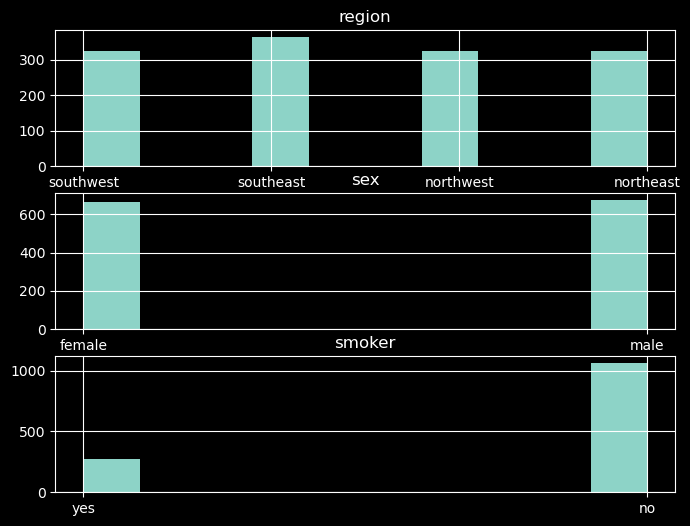

In [5]:
varNames = ['region','sex','smoker']

plt.figure(figsize=(8,6))
for i,name in enumerate(varNames):
  plt.subplot(3,1,i+1)
  df[name].hist()
  plt.title(name)


In [6]:
## Apply one hot encoding to the dataset
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Splitting Data and Normalization

In [7]:
# import train_test_split and split data
from sklearn.model_selection import train_test_split

#split dataframe into target class and features
X=df.drop('charges',axis=1)
y=df['charges']

#set to random state 42 to reproduce results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

#fitting the minmax scaler to training data
scaler = MinMaxScaler().fit(X_train)

#tranforming the data using the fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape,X_test.shape

((1069, 11), (268, 11))

In [10]:
#random seed for reproducibility
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation='relu'),

    tf.keras.layers.Dense(22,activation='relu'),
    tf.keras.layers.Dense(22,activation='relu'),

    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = 'adam')

model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
34/34 [==============================] - 5s 9ms/step - loss: 13030.0059 - val_loss: 14271.2646
Epoch 2/300
34/34 [==============================] - 0s 5ms/step - loss: 13028.5820 - val_loss: 14269.0000
Epoch 3/300
34/34 [==============================] - 0s 5ms/step - loss: 13024.2754 - val_loss: 14261.3008
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 13009.4072 - val_loss: 14235.4619
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 12964.8701 - val_loss: 14164.8086
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 12856.5244 - val_loss: 14006.7012
Epoch 7/300
34/34 [==============================] - 0s 5ms/step - loss: 12633.9707 - val_loss: 13702.8779
Epoch 8/300
34/34 [==============================] - 0s 5ms/step - loss: 12232.4541 - val_loss: 13178.4531
Epoch 9/300
34/34 [==============================] - 0s 6ms/step - loss: 11580.9365 - val_loss: 12374.6230
Epoch 10/300
34/34 [=================

Text(0.5, 1.0, 'Model learning Curve')

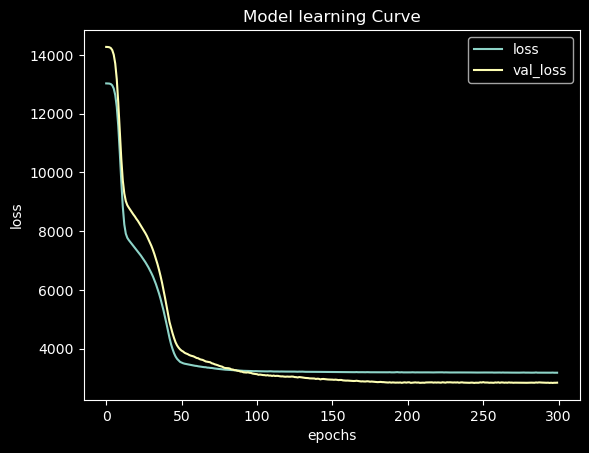

In [11]:
#put the loss and validation of the model into a pandas dataframe to plot
losses = {'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model learning Curve')

## Model Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#make predictions
yPred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'predicted prices')

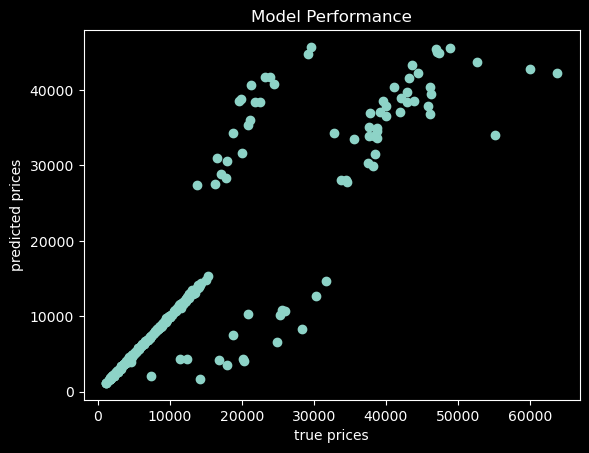

In [13]:
#plotting predictions with true values
plt.scatter(y_test,yPred)
plt.title('Model Performance')
plt.xlabel('true prices')
plt.ylabel('predicted prices')

In [14]:
print("Results")
print('MAE: {:.2f}'.format(mean_absolute_error(y_test,yPred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test,yPred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,yPred))))
print('R2-score: {:.2f}'.format(r2_score(y_test,yPred)))

Results
MAE: 2846.68
MSE: 38383479.14
RMSE: 6195.44
R2-score: 0.79


Text(0.5, 1.0, 'heatmap of the features')

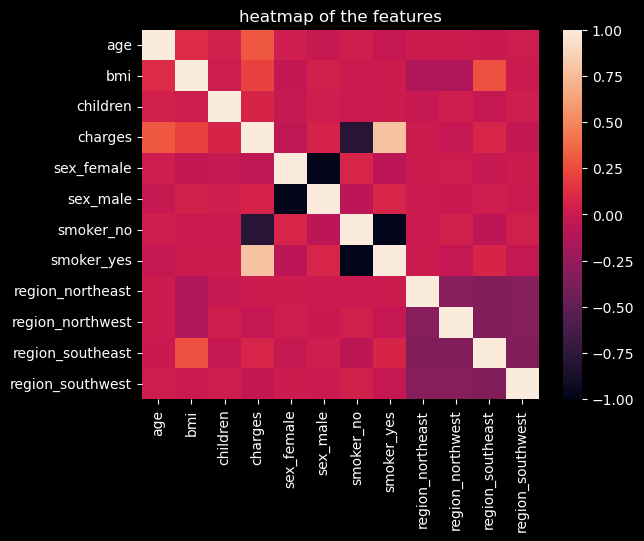

In [15]:
#plotting the heatmap of the dataset
sns.heatmap(df.corr())
plt.title('heatmap of the features')

Text(0.5, 1.0, "The features' correlation to medical insurance charge ")

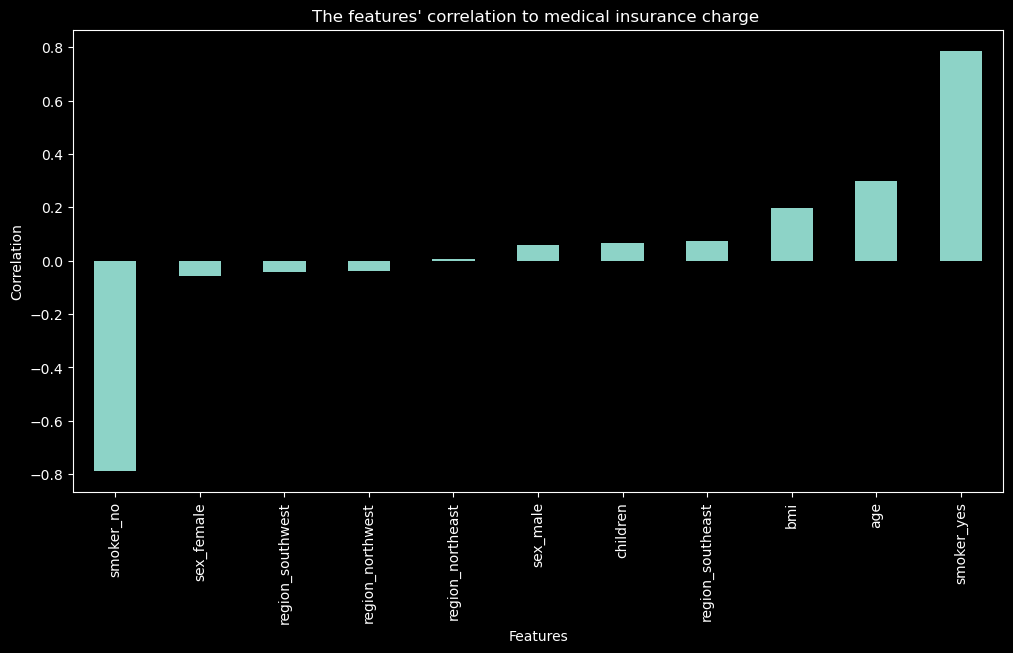

In [16]:
plt.figure(figsize=(12,6))
df.corr()['charges'].sort_values()[:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('The features\' correlation to medical insurance charge ' )

## Conclusion

The data was preprocessing using one hot encoding and normalization.

The recurrent neural network model with a 11 - 22 - 22 - 1 shape was trained in 300 epoches.

* MAE of 2846.68 shows that the model was able to predict the price of medical insurance with a deviation $2846.68

* MSE of 38383479.14 suggests that the model was able to predict the price of medical insurance with a squared difference of $38383479.14

* RMSE of 6195.44 suggests that the model is able to predict the price of medical insurance with a deviation of $6195.44

* R2 score of 0.79 suggests a strong fit between the predictions made by the model and the true prices as 79% of variance is explained by the model

`Smoking` and `Not Smoking` features had the most impact on the prediction of the medical insurance charges as they showed the highest positive and negative correlation to the target class respectively